In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### INICIALIZAR VARIABLES

In [8]:
dfofecu = pd.read_csv("../output/job_cleaned.csv")
dfpobl = pd.read_csv("../output/prov_clean.csv")
dfofecu['fechaPublicado']=pd.to_datetime(dfofecu['fechaPublicado'])
dfofecu['fechaFin']=pd.to_datetime(dfofecu['fechaFin'])

In [9]:
# Filtrar los cargos que contienen las palabras "programador" o "analista"
cargos_prgrm = dfofecu[dfofecu['cargo'].str.contains('HV-', case=False)]
cargos_dsrrll = dfofecu[dfofecu['cargo'].str.contains('Web', case=False)]

# Concatenar los dos conjuntos de datos para obtener todos los cargos que cumplen con alguna de las condiciones
cargos_interes = pd.concat([cargos_prgrm, cargos_dsrrll])



In [10]:
# Suponiendo que 'fechaPublicado' está en formato datetime
cargos_interes['Año'] = cargos_interes['fechaPublicado'].dt.year

# Unir los dos conjuntos de datos por la columna 'provincia'
merged_data = pd.merge(cargos_interes, dfpobl, on='provincia').reset_index(drop = True)

# Agrupar por año y contar la cantidad de demandas por cargo o sector
demandas_por_año = merged_data.groupby(['Año', 'cargo'])['cargo'].count().unstack()


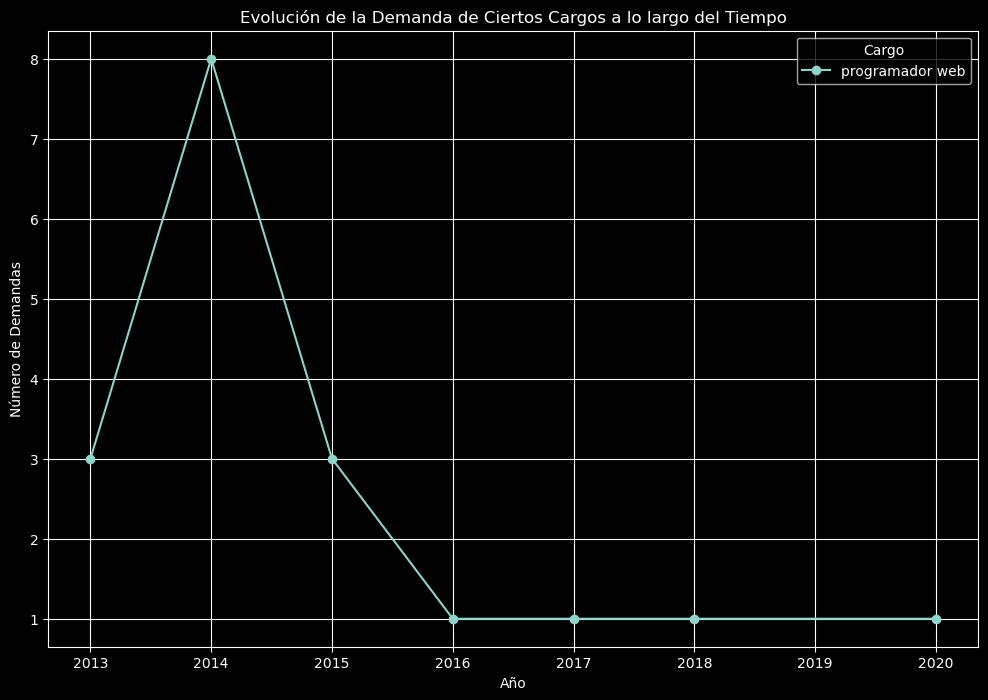

In [11]:
# Filtrar solo los tres cargos de interés
cargos_interes = ["programador punto net", "programador php", "programador cics cobol", "programador java", "programador junior" , "programador web","programador c# y sql","programador de sistemas multimedia", "programador-desarrollador", "ingenieros en programación -desarrollo"]
filtered_data = merged_data[merged_data['cargo'].isin(cargos_interes)]

# Agrupar por año y contar la cantidad de demandas por cargo
demandas_por_año = filtered_data.groupby(['Año', 'cargo'])['cargo'].count().unstack()

# Graficar la evolución de la demanda para los tres cargos de interés
demandas_por_año.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Evolución de la Demanda de Ciertos Cargos a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Demandas')
plt.legend(title='Cargo', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# 1.a ¿Cómo han evolucionado las demandas de ciertos cargos o sectores a lo largo del tiempo? 

## 1.1 Obtener los cargos con mayor iteraciones(>5) en el área de informática software 

In [12]:
# Ejemplo de obtener asistentes en el área de informática.
cargos_prgrm = dfofecu[dfofecu['cargo'].str.contains('asistente', case=False)]
cargos_prgrm = cargos_prgrm[cargos_prgrm["areaEstudios"].str.contains("informática", case=False)]

#cargos_dsrrll = dfofecu[dfofecu['cargo'].str.contains('Técnico', case=False)]
#cargos_dsrrll = cargos_dsrrll[cargos_dsrrll["areaEstudios"].str.contains("informática", case=False)]
cargos_interes = pd.concat([cargos_prgrm, cargos_dsrrll])

conteo_cargos = cargos_interes['cargo']
conteo_cargos = pd.DataFrame(conteo_cargos).reset_index(drop = True)
conteo_cargos["conteo"] = cargos_interes["cargo"].value_counts().reset_index(drop = True)
# 
conteo_cargos = conteo_cargos.loc[conteo_cargos["conteo"] > 5].reset_index(drop=True)


for elemento in conteo_cargos["cargo"]:
    print(elemento)

asistente tecnico
asistentes de help desk
asistente de zona integral
asistente de sistemas
asistente de help desk
asistente de sistemas
asistente de sistemas pc
asistente soporte tecnico
asistente de soporte
asistente tecnico informatico
asistente de producto
asistente electoral 1 (informático)
asistente help desk
asistente tecnico


### 1.1.1 AGRUPAR INFORMACIÓN

#### 1.1.2 PROGRAMADOR

C:\Users\jeanf\AppData\Local\Temp\ipykernel_25248\1427834359.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_progr["area"] = "Programador"


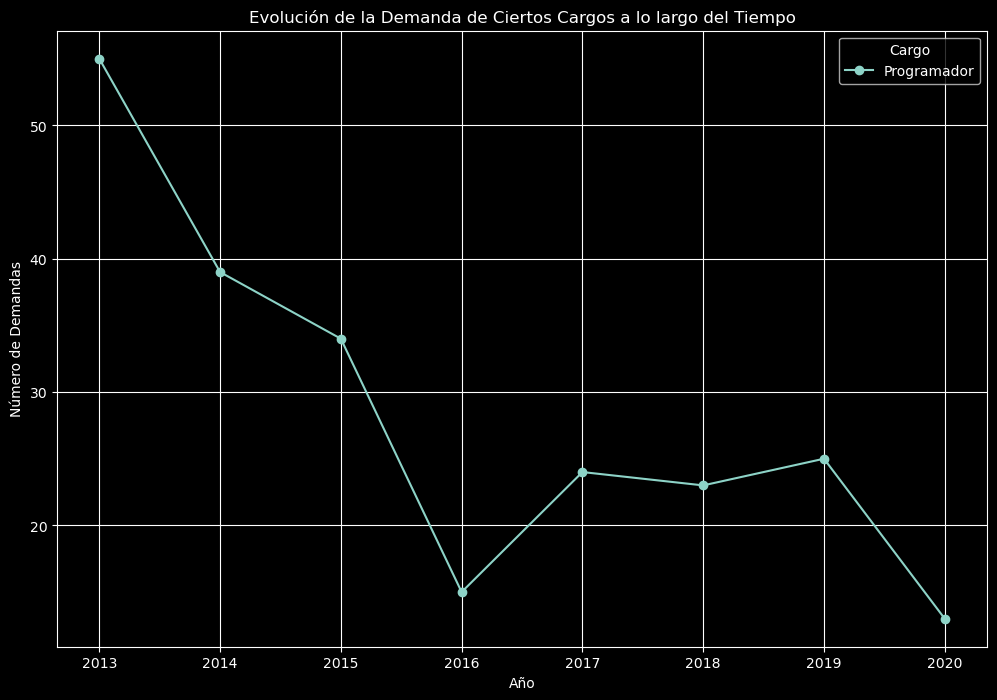

In [13]:
# Unir los dos conjuntos de datos por la columna 'provincia'
merged_data = pd.merge(dfofecu, dfpobl, on='provincia')
merged_data['Año'] = merged_data['fechaPublicado'].dt.year


cargos_interes = ["ingeniero de sistemas programador","programador punto net","programador php", "programador cics cobol","programadores", "ingeniero de sistemas programador","programador eventual","programador java","programador junior","programador junior", "programador","programador java", "programador java","programador junior","programador web","programador de sistemas multimedia","programador","programador junior","programador senior .net","programador jr.","programador junior .net","programador de sistemas multimedia","tecnico soporte / programador junior","programadores php","programador-desarrollador","programador vb y mysql"]
data_progr = merged_data[merged_data['cargo'].isin(cargos_interes)]
data_progr["area"] = "Programador"


#Agrupar por año y contar la cantidad de demandas por cargo o sector
demandas_por_año = data_progr.groupby(['Año', 'area'])['area'].count().unstack()

# Graficar la evolución de la demanda para los tres cargos de interés
demandas_por_año.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Evolución de la Demanda de Ciertos Cargos a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Demandas')
plt.legend(title='Cargo', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

C:\Users\jeanf\AppData\Local\Temp\ipykernel_25248\288771038.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_progr["area"] = "Tecnico"


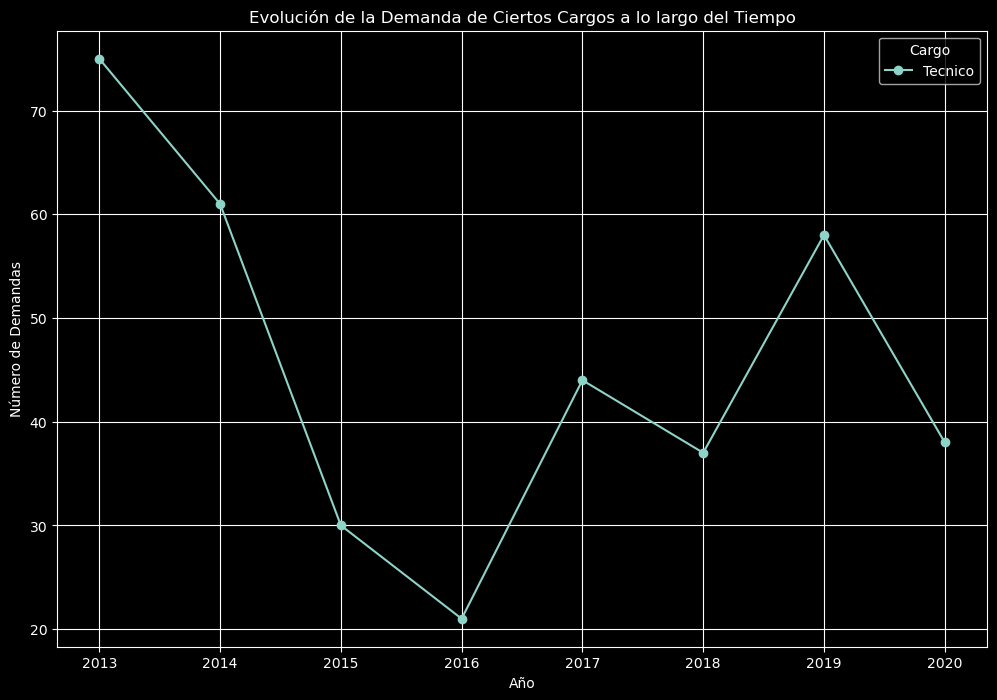

In [14]:
# Unir los dos conjuntos de datos por la columna 'provincia'
merged_data = pd.merge(dfofecu, dfpobl, on='provincia')
merged_data['Año'] = merged_data['fechaPublicado'].dt.year


cargos_interes = ["tecnico electronico","tecnico electronico con experiencia","tecnico sistemas helpdesk mantenimiento","asistente tecnico","tecnico de telecomunicaciones","tecnico junior para soporte informatico","tecnicos","tecnico en comunicaciones","tecnico instalador con experiencia","asistente soporte tecnico","ayudante junior-tecnico","tecnico","soporte tecnico","tecnico en sistemas","tecnico soporte a usuarios","tecnico instalador con movilizacion propia","asistente tecnico informatico","aisistente tecnico informatico","tecnico helpdesk experiencia instalacion de redes","tecnico en computadoras","analista de soporte tecnico","tecnico redes","asistente tecnico-universitario","tecnico en computacion","tecnico electronico redes","tecnico de fotocopiadoras","tecnico en celulares y servicio al cliente",'tecnico en celulares y servicio al cliente','bachiller informatico-electrico-electronica para tecnico de operacion y mantenimiento']
data_progr = merged_data[merged_data['cargo'].isin(cargos_interes)]
data_progr["area"] = "Tecnico"


#Agrupar por año y contar la cantidad de demandas por cargo o sector
demandas_por_año = data_progr.groupby(['Año', 'area'])['area'].count().unstack()

# Graficar la evolución de la demanda para los tres cargos de interés
demandas_por_año.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Evolución de la Demanda de Ciertos Cargos a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Demandas')
plt.legend(title='Cargo', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

C:\Users\jeanf\AppData\Local\Temp\ipykernel_25248\1736056844.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_progr["area"] = "Asistente"


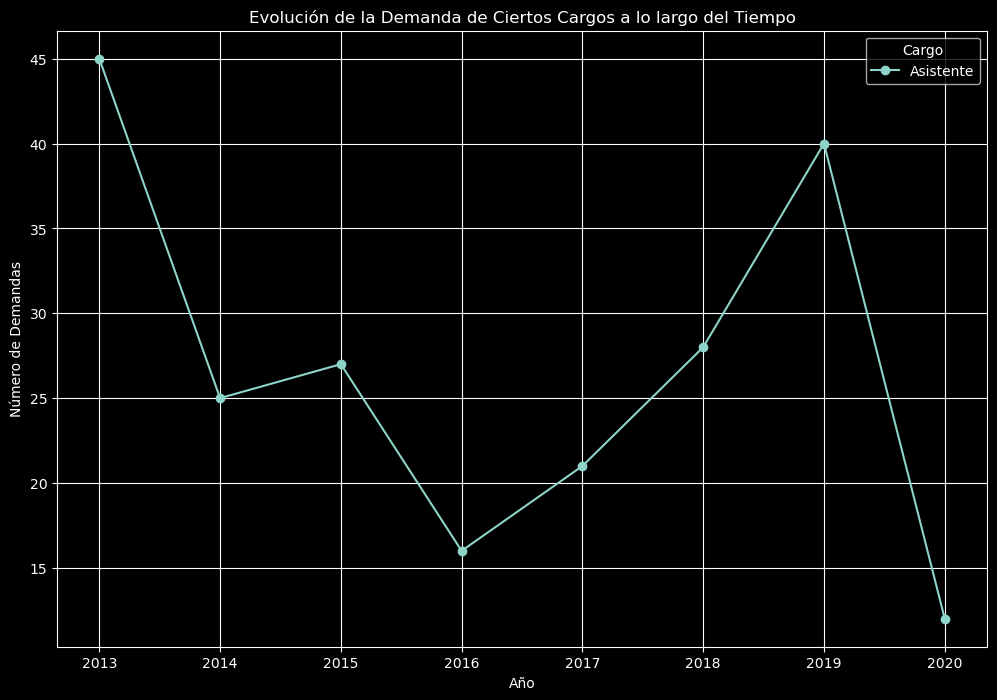

In [15]:
# Unir los dos conjuntos de datos por la columna 'provincia'
merged_data = pd.merge(dfofecu, dfpobl, on='provincia')
merged_data['Año'] = merged_data['fechaPublicado'].dt.year


cargos_interes = ["asistente tecnico","asistentes de help desk","asistente de zona integral","asistente de sistemas","asistente de help desk","asistente de sistemas pc","asistente soporte tecnico","asistente de soporte","asistente tecnico informatico","asistente de producto","asistente electoral 1 (informático)","asistente help desk","asistente tecnico-universitario","asistente de programacion","asistente de proyectos","tecnico electoral 1-asistente de comunicacion","asistente electoral 2-asistente de procesos","asistente electoral 1 -monitorieo de medios"]
data_progr = merged_data[merged_data['cargo'].isin(cargos_interes)]
data_progr["area"] = "Asistente"


#Agrupar por año y contar la cantidad de demandas por cargo o sector
demandas_por_año = data_progr.groupby(['Año', 'area'])['area'].count().unstack()

# Graficar la evolución de la demanda para los tres cargos de interés
demandas_por_año.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Evolución de la Demanda de Ciertos Cargos a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Demandas')
plt.legend(title='Cargo', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#### 1.1.3 COMBINAR DATA DE LAS 3 AREAS

C:\Users\jeanf\AppData\Local\Temp\ipykernel_25248\2729057351.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_progr["area"] = "Programador"
C:\Users\jeanf\AppData\Local\Temp\ipykernel_25248\2729057351.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_progr2["area"] = "Asistente"
C:\Users\jeanf\AppData\Local\Temp\ipykernel_25248\2729057351.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


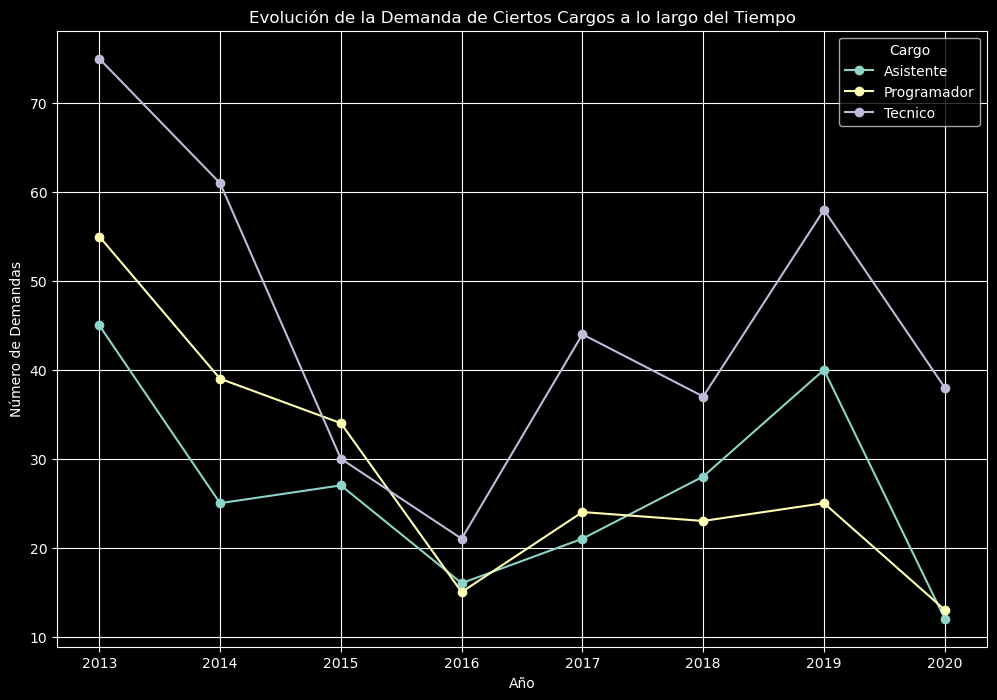

In [16]:
# Unir los dos conjuntos de datos por la columna 'provincia'
merged_data = pd.merge(dfofecu, dfpobl, on='provincia')
merged_data['Año'] = merged_data['fechaPublicado'].dt.year


cargos_interes = ["ingeniero de sistemas programador","programador punto net","programador php", "programador cics cobol","programadores", "ingeniero de sistemas programador","programador eventual","programador java","programador junior","programador junior", "programador","programador java", "programador java","programador junior","programador web","programador de sistemas multimedia","programador","programador junior","programador senior .net","programador jr.","programador junior .net","programador de sistemas multimedia","tecnico soporte / programador junior","programadores php","programador-desarrollador","programador vb y mysql"]
data_progr = merged_data[merged_data['cargo'].isin(cargos_interes)]
data_progr["area"] = "Programador"

cargos_interes = ["asistente tecnico","asistentes de help desk","asistente de zona integral","asistente de sistemas","asistente de help desk","asistente de sistemas pc","asistente soporte tecnico","asistente de soporte","asistente tecnico informatico","asistente de producto","asistente electoral 1 (informático)","asistente help desk","asistente tecnico-universitario","asistente de programacion","asistente de proyectos","tecnico electoral 1-asistente de comunicacion","asistente electoral 2-asistente de procesos","asistente electoral 1 -monitorieo de medios"]
data_progr2 = merged_data[merged_data['cargo'].isin(cargos_interes)]
data_progr2["area"] = "Asistente"

# Concatenar DataFrames verticalmente
merge_f = pd.concat([data_progr, data_progr2], ignore_index=True)



cargos_interes = ["tecnico electronico","tecnico electronico con experiencia","tecnico sistemas helpdesk mantenimiento","asistente tecnico","tecnico de telecomunicaciones","tecnico junior para soporte informatico","tecnicos","tecnico en comunicaciones","tecnico instalador con experiencia","asistente soporte tecnico","ayudante junior-tecnico","tecnico","soporte tecnico","tecnico en sistemas","tecnico soporte a usuarios","tecnico instalador con movilizacion propia","asistente tecnico informatico","aisistente tecnico informatico","tecnico helpdesk experiencia instalacion de redes","tecnico en computadoras","analista de soporte tecnico","tecnico redes","asistente tecnico-universitario","tecnico en computacion","tecnico electronico redes","tecnico de fotocopiadoras","tecnico en celulares y servicio al cliente",'tecnico en celulares y servicio al cliente','bachiller informatico-electrico-electronica para tecnico de operacion y mantenimiento']
data_progr3 = merged_data[merged_data['cargo'].isin(cargos_interes)]
data_progr3["area"] = "Tecnico"

# Concatenar DataFrames verticalmente
merge_f = pd.concat([merge_f, data_progr3], ignore_index=True)

#Agrupar por año y contar la cantidad de demandas por cargo o sector
demandas_por_año = merge_f.groupby(['Año', 'area'])['area'].count().unstack()

# Graficar la evolución de la demanda para los tres cargos de interés
demandas_por_año.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Evolución de la Demanda de Ciertos Cargos a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Demandas')
plt.legend(title='Cargo', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


# 1.b ¿Podemos identificar patrones estacionales o tendencias a lo largo de los años en el area de la tecnología?


In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

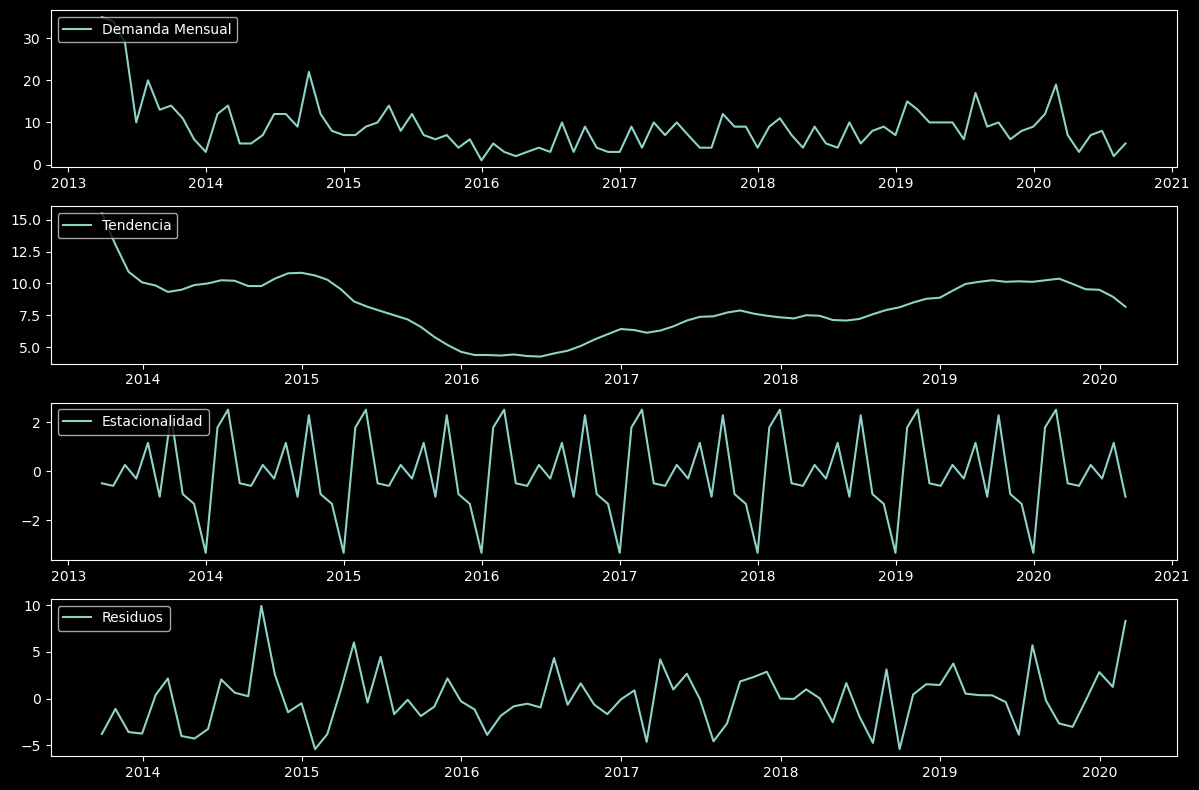

In [19]:
# Suponiendo que 'fechaPublicado' está en formato datetime
merge_f['fechaPublicado'] = pd.to_datetime(merge_f['fechaPublicado'])

# Establecer 'fechaPublicado' como índice
merge_f.set_index('fechaPublicado', inplace=True)

# Resample a nivel mensual y contar el número de demandas por mes
demandas_mensuales = merge_f['cargo'].resample('M').count()

# Descomposición de la serie temporal para identificar tendencias y estacionalidad
decomposition = sm.tsa.seasonal_decompose(demandas_mensuales, model='additive')

# Visualización de la descomposición
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(demandas_mensuales, label='Demanda Mensual')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuos')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# 2.a ¿Existe una correlación entre el nivel de instrucción requerido para un cargo y la remuneración ofrecida?

In [23]:
dfofecu.dtypes

Unnamed: 0                   int64
cargo                       object
modo                        object
fechaPublicado      datetime64[ns]
fechaFin            datetime64[ns]
plazas                       int64
experiencia                 object
capacitacion                object
jornadas                    object
remuneracion               float64
nivelInstruccion            object
areaEstudios                object
ciudad                      object
parroquia                   object
sector                      object
provincia                   object
dtype: object

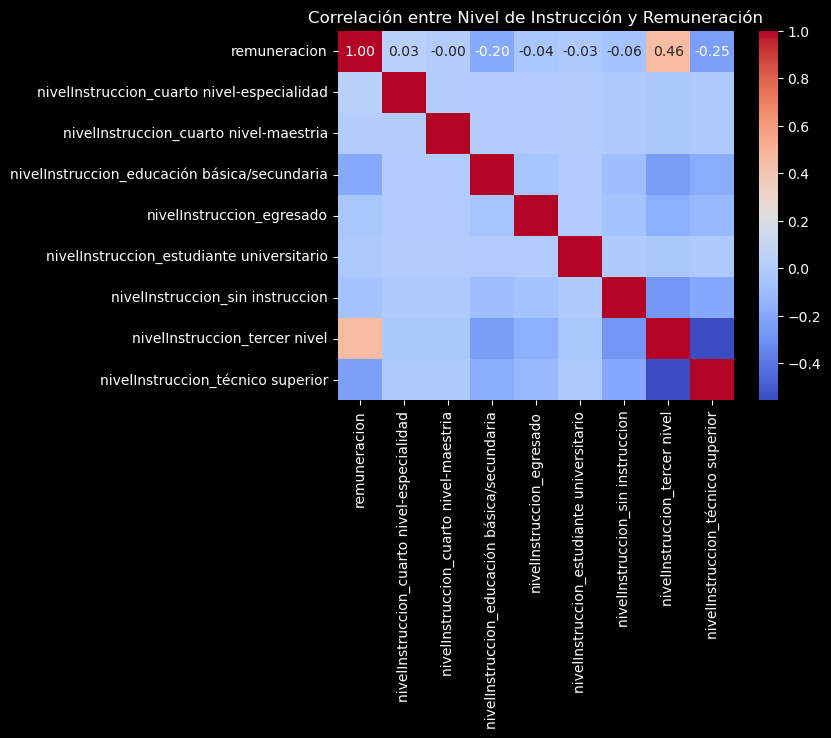

In [30]:
# Seleccionar columnas relevantes
df_subset = merge_f[['nivelInstruccion', 'remuneracion']]


# Codificación one-hot encoding para 'nivelInstruccion'
df_encoded = pd.get_dummies(df_subset, columns=['nivelInstruccion'], drop_first=True)

# Cálculo de correlación de Pearson
correlation_matrix = df_encoded.corr()

# Visualización de la matriz de correlación como un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Nivel de Instrucción y Remuneración')
plt.show()